In [1]:
import pyemma
import pickle
import numpy as np
from msmbuilder.utils import load,dump

%matplotlib inline
import matplotlib.pyplot as plt

/home/bhakat/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)

Bad key "text.kerning_factor" on line 4 in
/home/bhakat/anaconda3/envs/msmbuilder/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
with open('raw-features.pkl', 'rb') as f:
     features = pickle.load(f)      

In [3]:
with open('features.pkl', 'rb') as a:
     transfeatures = pickle.load(a)

In [4]:
with open('scaled-transformed-features.pkl', 'rb') as b:
     scaletransfeatures = pickle.load(b)

In [5]:
#cocatenate features
features_concatenated = np.concatenate(features)

In [6]:
#cocatenate transformed features
transfeatures_concatenated = np.concatenate(transfeatures)

In [7]:
#cocatenate scaled features
scaletransfeatures_concatenated = np.concatenate(scaletransfeatures)

In [8]:
cluster = pyemma.coordinates.cluster_kmeans(transfeatures, k=5, max_iter=250, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

100%|██████████| 5/5 [00:02<00:00,  2.29it/s]                             

100%|██████████| 32/32 [00:02<00:00, 13.82it/s]                                    


100%|██████████| 6/6 [00:00<00:00, 23.44it/s]                                 


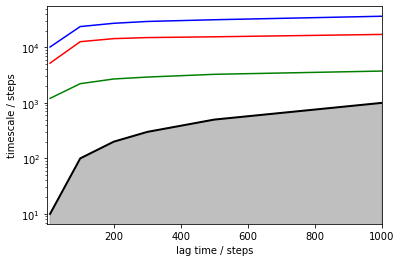

In [14]:
its = pyemma.msm.its(cluster.dtrajs, lags=[10, 100, 200, 300, 500, 1000], nits=3)
pyemma.plots.plot_implied_timescales(its);

In [9]:
lag = 200
#framesperns = 10
#msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=100, dt_traj='0.1 ns')
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=lag)

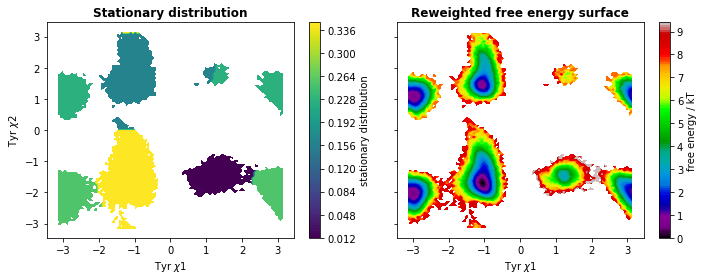

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *features_concatenated[:, :2].T,
    msm.pi[np.concatenate(msm.dtrajs_active)],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *features_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('Tyr $\chi1$')
axes[0].set_ylabel('Tyr $\chi2$')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()

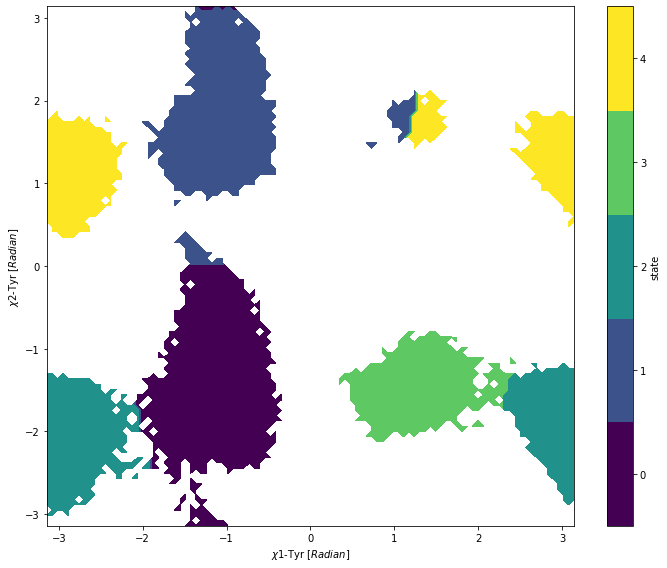

In [11]:
%matplotlib inline
 
fig, ax = plt.subplots(figsize=(10, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *features_concatenated[:, :2].T, dtrajs_concatenated, ax=ax)
ax.set_xlabel('$\chi1$-Tyr [$Radian$]')
ax.set_ylabel('$\chi2$-Tyr [$Radian$]')
fig.tight_layout()

In [12]:
msm.mfpt(0, 2) * 20 /1000

1486.5270354757665

In [13]:
msm.mfpt(1, 4) * 20 /1000

1687.8885890826177